<a href="https://colab.research.google.com/github/koustubh1012/ENPM809Y_Final_project/blob/master/eye_df_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDERNAME = "/ENPM703_final_project/images"
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My Drive/$FOLDERNAME/

/content/drive/My Drive/ENPM703_final_project/images


In [ ]:
filenames1 = [
    "TC001_39.png", "TC002_39.png", "TC003_37.png", "TC004_37.png", "TC005_37.png",
    "TC006_33.png", "TC007_33.png", "TC008_33.png", "TC009_33.png", "TC010_52.png",
    "TC016_54.png", "TC017_54.png", "TC018_54.png", "TC019_54.png", "TC020_54.png",
    "TC021_52.png", "TC022_52.png", "TC023_52.png", "TC024_52.png", "TC025_52.png",
    "TC026_37.png", "TC027_37.png", "TC028_30.png", "TC029_30.png", "TC030_30.png",
    "TC031_36.png", "TC032_36.png", "TC033_36.png", "TC034_31.png", "TC035_31.png",
    "TC036_31.png", "TC037_31.png", "TC038_39.png", "TC039_39.png", "TC040_39.png",
    "TC041_39.png", "TC042_40.png", "TC043_40.png", "TC044_40.png", "TC045_40.png",
    "TC046_37.png", "TC047_37.png", "TC048_37.png", "TC049_37.png", "TC050_35.png",
    "TC051_35.png", "TC052_35.png", "TC053_35.png", "TC054_30.png", "TC055_30.png",
    "TC056_30.png", "TC057_34.png", "TC058_34.png", "TC059_34.png", "TC060_34.png",
    "TC061_50.png", "TC062_50.png", "TC063_50.png", "TC064_50.png", "TC065_50.png",
    "TC066_43.png", "TC067_43.png", "TC068_43.png", "TC069_43.png", "TC070_48.png",
    "TC071_48.png", "TC072_48.png", "TC073_48.png", "TC074_52.png", "TC075_52.png",
    "TC076_52.png", "TC077_52.png", "TC078_52.png", "TC079_49.png", "TC080_49.png",
    "TC081_49.png", "TC082_49.png", "TC083_51.png", "TC084_51.png", "TC085_51.png",
    "TC086_51.png", "TC087_47.png", "TC088_47.png", "TC089_47.png", "TC090_47.png",
    "TC096_54.png", "TC097_54.png", "TC098_54.png", "TC099_54.png", "TC100_54.png",
    "TC101_36.png", "TC102_36.png", "TC103_36.png", "TC104_36.png", "TC105_39.png",
    "TC106_39.png", "TC107_39.png", "TC108_39.png", "TC109_37.png", "TC110_37.png",
    "TC111_37.png", "TC112_37.png", "TC113_33.png", "TC114_33.png", "TC115_33.png",
    "TC116_35.png", "TC117_35.png", "TC118_35.png", "TC119_35.png", "TC120_30.png",
    "TC121_30.png", "TC122_30.png", "TC123_30.png", "TC124_34.png", "TC125_34.png",
    "TC126_34.png", "TC127_34.png", "TC128_55.png", "TC129_55.png", "TC130_47.png",
    "TC131_47.png", "TC132_47.png", "TC133_47.png", "TC134_36.png", "TC135_36.png",
    "TC136_36.png", "TC137_40.png", "TC138_40.png", "TC139_40.png", "TC140_40.png",
    "TC141_37.png", "TC142_37.png", "TC143_37.png", "TC144_37.png", "TC145_35.png",
    "TC146_35.png", "TC147_35.png", "TC148_30.png", "TC149_30.png", "TC150_30.png",
    "TC151_30.png", "TC152_34.png", "TC153_34.png", "TC154_34.png", "TC155_34.png",
    "TC156_36.png", "TC157_36.png", "TC158_36.png", "TC159_36.png", "TC160_39.png",
    "TC161_39.png", "TC162_39.png", "TC163_39.png", "TC164_37.png", "TC165_37.png",
    "TC166_37.png", "TC167_37.png", "TC168_33.png", "TC169_33.png", "TC170_33.png",
    "TC171_33.png", "TC172_35.png", "TC173_35.png", "TC174_35.png", "TC175_35.png",
    "TC176_30.png", "TC177_30.png", "TC178_30.png", "TC179_30.png", "TC180_34.png",
    "TC181_34.png", "TC182_34.png", "TC183_34.png", "TC184_50.png", "TC185_50.png",
    "TC186_50.png", "TC187_50.png", "TC188_43.png", "TC189_43.png", "TC190_43.png",
    "TC191_48.png", "TC192_48.png", "TC193_48.png", "TC194_48.png", "TC195_52.png",
    "TC196_52.png", "TC197_52.png", "TC198_52.png", "TC199_49.png", "TC200_49.png",
    "TC201_49.png", "TC202_49.png", "TC203_51.png", "TC204_51.png", "TC205_51.png",
    "TC206_51.png", "TC207_47.png", "TC208_47.png", "TC209_47.png", "TC210_47.png",
    "TC216_54.png", "TC217_54.png", "TC218_54.png", "TC219_54.png", "TC220_54.png",
    "TC221_50.png", "TC222_50.png", "TC223_50.png", "TC224_50.png", "TC225_52.png",
    "TC226_52.png", "TC227_52.png", "TC228_52.png", "TC229_57.png", "TC230_57.png",
    "TC231_57.png", "TC232_57.png", "TC233_57.png", "TC234_59.png", "TC235_59.png",
    "TC236_59.png", "TC237_59.png", "TC243_57.png", "TC244_53.png", "TC245_53.png",
    "TC246_53.png", "TC247_53.png", "TC248_53.png", "TC249_57.png", "TC250_57.png",
    "TC251_57.png", "TC252_57.png", "TC253_57.png", "TC254_59.png", "TC255_59.png",
    "TC256_59.png", "TC257_59.png", "TC263_32.png", "TC264_32.png", "TC265_32.png",
    "TC266_32.png", "TC267_33.png", "TC268_33.png", "TC269_33.png", "TC270_57.png",
    "TC271_57.png", "TC272_57.png", "TC273_56.png", "TC274_56.png", "TC275_56.png",
    "TC276_53.png", "TC277_53.png", "TC278_32.png", "TC279_32.png", "TC280_32.png",
    "TC281_32.png", "TC282_32.png", "TC283_32.png", "TC284_32.png", "TC285_32.png",
    "TC286_40.png", "TC287_40.png", "TC288_40.png", "TC289_40.png", "TC290_40.png",
    "TC291_40.png", "TC292_40.png", "TC293_46.png", "TC294_46.png", "TC295_46.png",
    "TC296_46.png", "TC297_46.png", "TC298_40.png", "TC299_33.png", "TC300_33.png",
    "TC301_33.png", "TC302_33.png", "TC303_57.png"]

In [ ]:
filenames1.extend([
    "TS001_11.png", "TS002_11.png", "TS006_20.png", "TS007_20.png", "TS008_20.png",
    "TS009_19.png", "TS010_19.png", "TS011_27.png", "TS012_15.png", "TS013_15.png",
    "TS014_17.png", "TS015_17.png", "TS016_17.png", "TS020_20.png", "TS021_20.png",
    "TS022_20.png", "TS023_19.png", "TS024_19.png", "TS025_19.png", "TS026_15.png",
    "TS027_15.png", "TS028_18.png", "TS029_11.png", "TS030_11.png", "TS031_07.png",
    "TS032_11.png", "TS033_11.png", "TS034_13.png", "TS035_13.png", "TS036_13.png",
    "TS037_13.png", "TS040_20.png", "TS041_20.png", "TS042_19.png", "TS043_19.png",
    "TS044_19.png", "TS045_15.png", "TS046_15.png", "TS047_17.png", "TS048_18.png",
    "TS049_14.png", "TS050_14.png", "TS051_14.png", "TS052_07.png", "TS053_07.png",
    "TS054_11.png", "TS055_11.png", "TS056_11.png", "TS057_13.png", "TS058_13.png",
    "TS062_20.png", "TS063_20.png", "TS064_19.png", "TS065_19.png", "TS066_19.png",
    "TS067_15.png", "TS068_15.png", "TS069_17.png", "TS070_18.png", "TS071_14.png",
    "TS072_14.png", "TS073_07.png", "TS074_11.png", "TS075_07.png", "TS076_11.png",
    "TS077_13.png", "TS078_13.png", "TS079_13.png", "TS082_20.png", "TS083_20.png",
    "TS084_20.png", "TS085_19.png", "TS086_19.png", "TS087_15.png", "TS088_18.png",
    "TS089_18.png", "TS090_18.png", "TS091_14.png", "TS092_14.png", "TS093_14.png",
    "TS094_22.png", "TS095_22.png", "TS096_22.png", "TS097_22.png", "TS098_22.png",
    "TS099_24.png", "TS100_24.png", "TS101_24.png", "TS102_24.png", "TS103_13.png",
    "TS104_13.png", "TS108_20.png", "TS109_20.png", "TS110_19.png", "TS111_19.png",
    "TS112_19.png", "TS113_15.png", "TS114_18.png", "TS115_18.png", "TS116_14.png",
    "TS117_14.png", "TS118_09.png", "TS119_09.png", "TS120_09.png", "TS121_10.png",
    "TS122_10.png", "TS123_10.png", "TS124_10.png", "TS125_03.png", "TS126_01.png",
    "TS127_01.png", "TS128_01.png", "TS129_01.png", "TS130_10.png", "TS131_10.png",
    "TS132_10.png", "TS133_01.png", "TS134_01.png", "TS135_05.png", "TS136_06.png",
    "TS137_06.png", "TS138_06.png", "TS139_06.png", "TS140_05.png", "TS141_05.png",
    "TS142_01.png", "TS143_05.png", "TS144_05.png", "TS145_05.png", "TS146_10.png",
    "TS147_10.png", "TS148_10.png", "TS149_10.png", "TS150_06.png", "TS151_06.png",
    "TS152_05.png", "TS153_05.png", "TS154_03.png", "TS155_03.png", "TS156_03.png",
    "TS157_03.png", "TS158_02.png", "TS159_02.png", "TS160_02.png", "TS161_06.png",
    "TS162_06.png", "TS163_05.png", "TS164_02.png", "TS165_02.png", "TS166_17.png",
    "TS167_24.png", "TS168_24.png", "TS169_24.png", "TS170_24.png", "TS171_24.png",
    "TS172_24.png", "TS173_24.png", "TS174_24.png", "TS175_17.png", "TS176_03.png",
    "TS177_04.png", "TS178_03.png", "TS179_03.png", "TS180_05.png", "TS181_03.png",
    "TS182_03.png", "TS183_03.png", "TS184_02.png", "TS185_01.png", "TS186_01.png",
    "TS187_06.png", "TS188_05.png", "TS189_04.png", "TS190_04.png", "TS191_01.png",
    "TS192_04.png", "TS193_03.png", "TS194_04.png", "TS195_09.png", "TS196_10.png",
    "TS197_10.png", "TS198_10.png", "TS199_10.png", "TS200_04.png", "TS201_04.png",
    "TS202_04.png", "TS203_17.png", "TS204_04.png", "TS205_04.png", "TS206_03.png",
    "TS207_03.png", "TS208_02.png", "TS209_04.png", "TS210_08.png", "TS211_08.png",
    "TS212_08.png", "TS213_04.png", "TS214_01.png", "TS215_06.png", "TS216_06.png",
    "TS217_06.png", "TS218_08.png", "TS219_04.png", "TS220_04.png", "TS221_06.png",
    "TS222_08.png", "TS223_16.png", "TS224_16.png", "TS225_29.png", "TS226_29.png",
    "TS227_28.png", "TS228_28.png", "TS229_23.png", "TS230_23.png", "TS231_23.png",
    "TS232_23.png", "TS233_23.png", "TS234_23.png", "TS235_12.png"
])

In [ ]:
eye_df_data = [(filename, filename[:2]) for filename in filenames1]

In [ ]:
eye_df = pd.DataFrame(eye_df_data, columns = ['filename','label'])

In [ ]:
eye_df.head()

,filename,label
0,TC001_39.png,TC
1,TC002_39.png,TC
2,TC003_37.png,TC
3,TC004_37.png,TC
4,TC005_37.png,TC


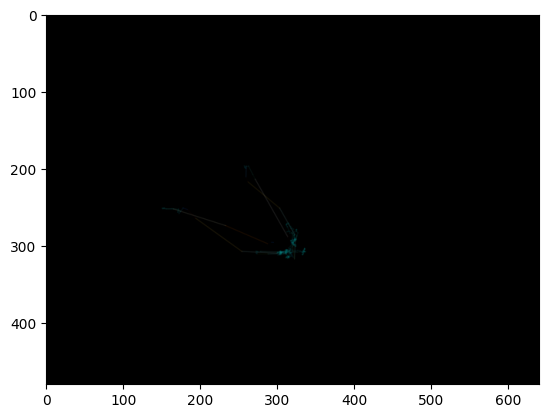

In [ ]:
image_path = eye_df['filename'][2]
image = plt.imread(image_path)
plt.imshow(image)
plt.show()

In [ ]:
X = eye_df['filename']
y = eye_df['label']

In [ ]:
y.value_counts()

,count
label,
TC,278
TS,219


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import load_img, img_to_array

image_height = 64
image_width = 64

def preprocess_image(image_path):
    image = load_img(image_path, target_size=(image_height, image_width))
    image = img_to_array(image)
    image = image / 255.0
    return image


X_processed = [preprocess_image(image_path) for image_path in eye_df['filename']]
X = tf.stack(X_processed)
X = X.numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(eye_df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
])

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    data_augmentation,
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.03), input_shape=(image_height, image_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.03)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.03)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.03)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])
optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5096 - loss: 11.0457 - val_accuracy: 0.5600 - val_loss: 10.1375
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5010 - loss: 10.7306 - val_accuracy: 0.5600 - val_loss: 10.0817
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5514 - loss: 10.4266 - val_accuracy: 0.5600 - val_loss: 10.0318
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4623 - loss: 10.6658 - val_accuracy: 0.5600 - val_loss: 9.9924
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5795 - loss: 10.2025 - val_accuracy: 0.5600 - val_loss: 9.9612
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6103 - loss: 10.1426 - val_accuracy: 0.5600 - val_loss: 9.9369
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5613 - loss: 10.2304 - val_accuracy: 0.5600 - val_loss: 9.9175
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5391 - loss: 10.0809 - val_a

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7264 - loss: 5.3325 


[5.316863536834717, 0.7300000190734863]

In [ ]:

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_new = (y_pred > 0.5).astype(int)
classification_report_eye = classification_report(y_test, y_pred_new)
print(classification_report_eye)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        56
           1       0.74      0.64      0.68        44

    accuracy                           0.74       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.74      0.74       100



In [ ]:
from sklearn.metrics import roc_curve
probabilities = model.predict(X_test)
y_pred = (probabilities > 0.4).astype(int)
report = classification_report(y_test, y_pred)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        56
           1       0.67      0.80      0.73        44

    accuracy                           0.74       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.75      0.74      0.74       100



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

In [ ]:
desired_recall = 0.9
closest_index = np.argmin(abs(tpr-desired_recall))
tpr[closest_index], thresholds[closest_index], fpr[closest_index]

In [ ]:
#Testing with new threshold 0.12
from sklearn.metrics import roc_curve
probabilities = model.predict(X_test)
y_pred = (probabilities > 0.12).astype(int)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
#Hence with a desired threshold of 0.12 we are able to achieve a recall of 0.91 thereby indicating a high performance in detecting TPS